# Comparing VNIR and VSWIR co-registration on PRISMA image
image: PRS_L1_STD_OFFL_20210321213856_20210321213901_0001 (snowy image near Denali)

Note: In this example it is the raw L1 data and is not reprojected, applied smile projection, or undergone any other co-registration method.

The idea here is that methods like AROSICS may not be totally needed for applications like this where images are from the same satellite at the same time.. and so using a faster method: skimage.registration.phase_cross_correlation

In [1]:
import numpy as np
from spectral import *
import matplotlib.pyplot as plt

import hyperquest

# Example usage
hdr_path = '/Users/brent/Documents/DEM_DATA/PRISMA/DENALI/PRS_20210321213856_20210321213901_0001/PRS_20210321213856_20210321213901_0001_rdn.hdr'


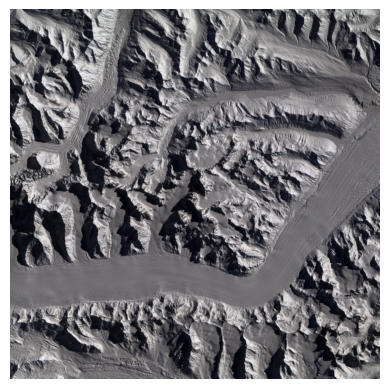

In [2]:
# Load raster
img_path = hyperquest.get_img_path_from_hdr(hdr_path)
array = np.array(envi.open(hdr_path, img_path).load(), dtype=np.float64)
red = array[:,:,45]
blue = array[:,:,15]
green = array[:,:,34]

red= np.ma.masked_equal(red, -9999)
green = np.ma.masked_equal(green, -9999)
blue = np.ma.masked_equal(blue, -9999)

# Normalize the values for display
red_normalized = (red - red.min()) / (red.max() - red.min())
green_normalized = (green - green.min()) / (green.max() - green.min())
blue_normalized = (blue - blue.min()) / (blue.max() - blue.min())
rgb_image = np.dstack((red_normalized, green_normalized, blue_normalized))
plt.imshow(rgb_image)
plt.axis('off')
plt.show()

In [4]:
# Select band index for VNIR and VSWIR cameras
band_index_vnir = 3
band_index_vswir = 215


# Compute spatial shifts with sub-pixel refinement
x_shift, y_shift = hyperquest.sub_pixel_shift(hdr_path, band_index_vnir, band_index_vswir, no_data_value=-9999)


print(f'x shift: {x_shift} pix,  y shift: {y_shift} pix')


x shift: 0.0344 pix,  y shift: 0.1194 pix


Comparing to results by Cogliati et al (2021) where spatial shifts between PRISMA's channel 64 (VNIR spectrometer) and channel 74 (SWIR spectrometer) in the across- and along-track directions estimated by AROSICS was equal to RMSE of about 5.18 m  (0.17 pix),

In [6]:
# Select band index for VNIR and VSWIR cameras
band_index_vnir = 64 - 1 # index minus 1 for python
band_index_vswir = 74 - 1 # index minus 1 for python


# Compute spatial shifts with sub-pixel refinement
x_shift, y_shift = hyperquest.sub_pixel_shift(hdr_path, band_index_vnir, band_index_vswir, no_data_value=-9999)


print(f'x shift: {x_shift} pix,  y shift: {y_shift} pix')

x shift: -0.0068 pix,  y shift: -0.0042 pix


but this really varies based on which bands you select. Here i do a small sensitivity analysis, and compute means for x-shift and y-shift 

In [14]:
# List of VNIR and VSWIR band combinations
band_combinations = [(63, 73), (62, 74), (61, 75), (60, 76) , (59,77), (58, 78),
                     (62, 73), (61, 74), (60, 75), (59, 76) , (58,77), (57, 78)]

# Initialize lists to store results
x_shifts = []
y_shifts = []
labels = []

# Compute sub-pixel shifts for each band combination
for vnir, vswir in band_combinations:
    x_shift, y_shift = hyperquest.sub_pixel_shift(hdr_path, vnir, vswir, no_data_value=-9999)
    x_shifts.append(x_shift)
    y_shifts.append(y_shift)

print(f'mean x shift: {np.mean(x_shifts)} pix,  mean y shift: {np.mean(y_shifts)} pix')

mean x shift: -0.010816666666666667 pix,  mean y shift: 0.05163333333333333 pix
